In [1]:
from timedataparser import load_all
import tools
from matplotlib import pyplot as plt

header,_,data,_ = load_all('/home/dgotzens/recording/23-10-13/')
start, end = 150, 900
M,K,L = data.shape

drift = [tools.unwrap(tools.drift(tools.rangedata(data[:,k,start:end])).angle()) for k in range(K)]


loaded data with shape torch.Size([1022, 192, 2882])
tensor(0.0386, dtype=torch.float64) tensor(False)
tensor(0.0418, dtype=torch.float64) tensor(False)
tensor(0.0483, dtype=torch.float64) tensor(False)
tensor(0.0456, dtype=torch.float64) tensor(False)
tensor(0.0323, dtype=torch.float64) tensor(False)
tensor(0.0322, dtype=torch.float64) tensor(False)
tensor(0.0346, dtype=torch.float64) tensor(False)
tensor(0.0323, dtype=torch.float64) tensor(False)
tensor(0.0469, dtype=torch.float64) tensor(False)
tensor(0.0395, dtype=torch.float64) tensor(False)
tensor(0.0388, dtype=torch.float64) tensor(False)
tensor(0.0366, dtype=torch.float64) tensor(False)
tensor(0.0669, dtype=torch.float64) tensor(False)
tensor(0.0555, dtype=torch.float64) tensor(False)
tensor(0.0561, dtype=torch.float64) tensor(False)
tensor(0.0467, dtype=torch.float64) tensor(False)
tensor(0.0364, dtype=torch.float64) tensor(False)
tensor(0.0436, dtype=torch.float64) tensor(False)
tensor(0.0462, dtype=torch.float64) tensor(Fals

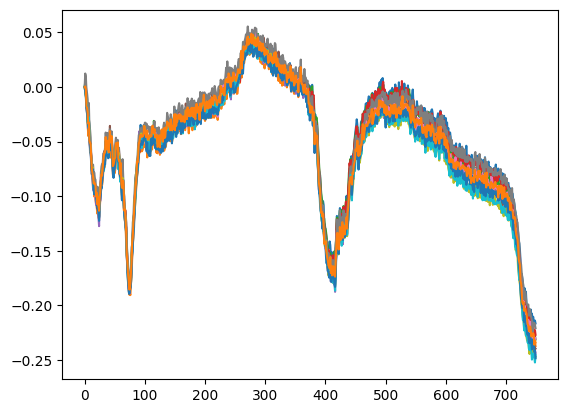

In [2]:
from matplotlib import pyplot as plt
for k in range(12):
    plt.plot(drift[k])
plt.show()


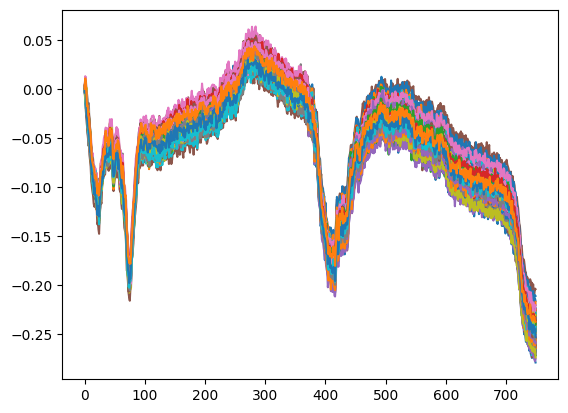

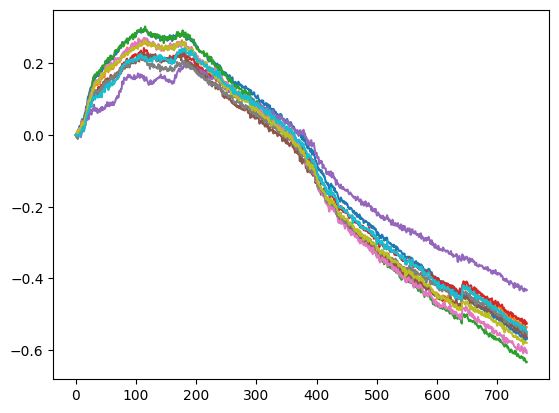

182 10


In [3]:
mse = lambda x,y : (x-y).abs().square().mean()
differences = [mse(drift[k],drift[12]) for k in range(K)]
other = differences.index(max(differences))
group_id = [0 if mse(drift[k],drift[12])<mse(drift[k],drift[other]) else 1 for k in range(K)]

for id,drft in zip(group_id,drift):
    if id == 1:
        plt.plot(drft)
plt.show()

for id,drft in zip(group_id,drift):
    if id == 0:
        plt.plot(drft)
plt.show()

print(group_id.count(1),group_id.count(0))

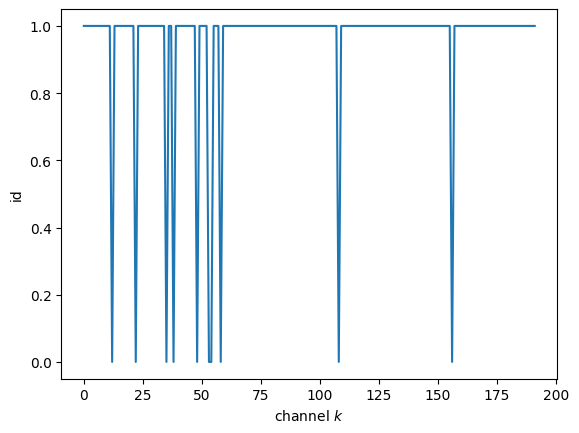

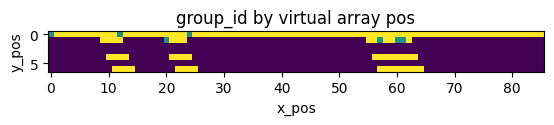

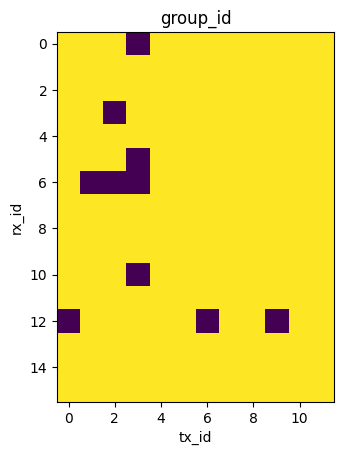

In [4]:
x_pos = {int(ramp['RampId']) : int(ramp['X']) for chirp in header['Chirps'] for ramp in chirp['Ramps']}
y_pos = {int(ramp['RampId']) : int(ramp['Y']) for chirp in header['Chirps'] for ramp in chirp['Ramps']}

x_pos = [x_pos[k] for k in range(K)]
y_pos = [y_pos[k] for k in range(K)]

import torch
img = torch.full((max(x_pos)+1, max(y_pos)+1), -1)
for k in range(K):
    img[x_pos[k], y_pos[k]] = group_id[k]

plt.plot(group_id)
plt.xlabel(r'channel $k$')
plt.ylabel('id')
plt.show()

plt.imshow(img.T)
plt.xlabel('x_pos')
plt.ylabel('y_pos')
plt.title('group_id by virtual array pos')
plt.show()


rx_id = {int(ramp['RampId']) : int(ramp['RxId']) for chirp in header['Chirps'] for ramp in chirp['Ramps']}
tx_id = {int(ramp['RampId']) : int(chirp['ChirpId']) for chirp in header['Chirps'] for ramp in chirp['Ramps']}

rx_id = [rx_id[k] for k in range(K)]
tx_id = [tx_id[k] for k in range(K)]

img = torch.full((max(rx_id)+1, max(tx_id)+1), -1)
for k in range(K):
    img[rx_id[k], tx_id[k]] = group_id[k]

plt.imshow(img)
plt.xlabel('tx_id')
plt.ylabel('rx_id')
plt.title('group_id')
plt.show()



In [5]:
print([(k,rx_id[k], tx_id[k]) for k in range(K)])

[(0, 0, 0), (1, 1, 0), (2, 2, 0), (3, 3, 0), (4, 4, 0), (5, 5, 0), (6, 6, 0), (7, 7, 0), (8, 8, 0), (9, 9, 0), (10, 10, 0), (11, 11, 0), (12, 12, 0), (13, 13, 0), (14, 14, 0), (15, 15, 0), (16, 0, 1), (17, 1, 1), (18, 2, 1), (19, 3, 1), (20, 4, 1), (21, 5, 1), (22, 6, 1), (23, 7, 1), (24, 8, 1), (25, 9, 1), (26, 10, 1), (27, 11, 1), (28, 12, 1), (29, 13, 1), (30, 14, 1), (31, 15, 1), (32, 0, 2), (33, 1, 2), (34, 2, 2), (35, 3, 2), (36, 4, 2), (37, 5, 2), (38, 6, 2), (39, 7, 2), (40, 8, 2), (41, 9, 2), (42, 10, 2), (43, 11, 2), (44, 12, 2), (45, 13, 2), (46, 14, 2), (47, 15, 2), (48, 0, 3), (49, 1, 3), (50, 2, 3), (51, 3, 3), (52, 4, 3), (53, 5, 3), (54, 6, 3), (55, 7, 3), (56, 8, 3), (57, 9, 3), (58, 10, 3), (59, 11, 3), (60, 12, 3), (61, 13, 3), (62, 14, 3), (63, 15, 3), (64, 0, 4), (65, 1, 4), (66, 2, 4), (67, 3, 4), (68, 4, 4), (69, 5, 4), (70, 6, 4), (71, 7, 4), (72, 8, 4), (73, 9, 4), (74, 10, 4), (75, 11, 4), (76, 12, 4), (77, 13, 4), (78, 14, 4), (79, 15, 4), (80, 0, 5), (81, 1,

In [6]:
print([f'chip{tx_id[k]%3} ant{tx_id[k]//3}: ch{k}' for k in range(K)])
print(f'RampIds:\t{[k for k in range(K) if group_id[k] == 0]}')
print(f'RxId:\t\t{[rx_id[k] for k in range(K) if group_id[k] == 0]}')
print(f'ChirpId:\t{[tx_id[k] for k in range(K) if group_id[k] == 0]}')
print(f'X:\t\t{[x_pos[k] for k in range(K) if group_id[k] == 0]}')
print(f'Y:\t\t{[y_pos[k] for k in range(K) if group_id[k] == 0]}')

print(f'Rx-Chip: {[[3,0,2,1][rx_id[k]//4] for k in range(K) if group_id[k]==0]}')
print(f'Tx-Chip: {[tx_id[k]//3 for k in range(K) if group_id[k]==0]}')
print([k for k in range(K) if group_id[k] == 0])
print([k%16 for k in range(K) if group_id[k] == 0])
print([k//16 for k in range(K) if group_id[k] == 0])

['chip0 ant0: ch0', 'chip0 ant0: ch1', 'chip0 ant0: ch2', 'chip0 ant0: ch3', 'chip0 ant0: ch4', 'chip0 ant0: ch5', 'chip0 ant0: ch6', 'chip0 ant0: ch7', 'chip0 ant0: ch8', 'chip0 ant0: ch9', 'chip0 ant0: ch10', 'chip0 ant0: ch11', 'chip0 ant0: ch12', 'chip0 ant0: ch13', 'chip0 ant0: ch14', 'chip0 ant0: ch15', 'chip1 ant0: ch16', 'chip1 ant0: ch17', 'chip1 ant0: ch18', 'chip1 ant0: ch19', 'chip1 ant0: ch20', 'chip1 ant0: ch21', 'chip1 ant0: ch22', 'chip1 ant0: ch23', 'chip1 ant0: ch24', 'chip1 ant0: ch25', 'chip1 ant0: ch26', 'chip1 ant0: ch27', 'chip1 ant0: ch28', 'chip1 ant0: ch29', 'chip1 ant0: ch30', 'chip1 ant0: ch31', 'chip2 ant0: ch32', 'chip2 ant0: ch33', 'chip2 ant0: ch34', 'chip2 ant0: ch35', 'chip2 ant0: ch36', 'chip2 ant0: ch37', 'chip2 ant0: ch38', 'chip2 ant0: ch39', 'chip2 ant0: ch40', 'chip2 ant0: ch41', 'chip2 ant0: ch42', 'chip2 ant0: ch43', 'chip2 ant0: ch44', 'chip2 ant0: ch45', 'chip2 ant0: ch46', 'chip2 ant0: ch47', 'chip0 ant1: ch48', 'chip0 ant1: ch49', 'chip0 an

loaded data with shape torch.Size([1022, 192, 42])
torch.Size([1022, 192, 42])
tensor(0.1195) tensor(False)
tensor(0.1392) tensor(False)
tensor(0.1405) tensor(False)
tensor(0.1352) tensor(False)
tensor(0.0856) tensor(False)
tensor(0.0813) tensor(False)
tensor(0.0884) tensor(False)
tensor(0.0845) tensor(False)
tensor(0.0729) tensor(False)
tensor(0.0702) tensor(False)
tensor(0.0656) tensor(False)
tensor(0.0645) tensor(False)
tensor(0.1190) tensor(False)
tensor(0.1221) tensor(False)
tensor(0.1200) tensor(False)
tensor(0.1007) tensor(False)
tensor(0.1077) tensor(False)
tensor(0.1313) tensor(False)
tensor(0.1377) tensor(False)
tensor(0.1360) tensor(False)
tensor(0.0896) tensor(False)
tensor(0.0839) tensor(False)
tensor(0.0920) tensor(False)
tensor(0.0868) tensor(False)
tensor(0.0724) tensor(False)
tensor(0.0724) tensor(False)
tensor(0.0662) tensor(False)
tensor(0.0693) tensor(False)
tensor(0.1001) tensor(False)
tensor(0.1062) tensor(False)
tensor(0.1077) tensor(False)
tensor(0.1015) tensor(

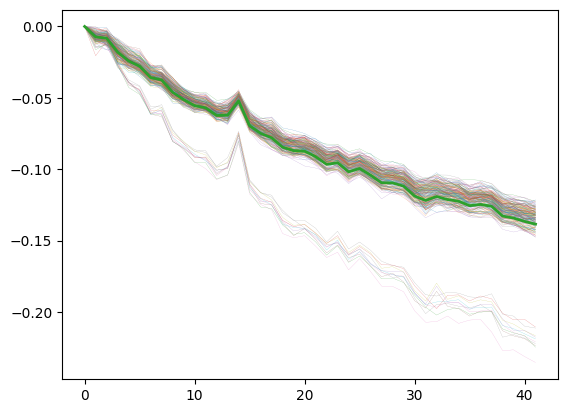

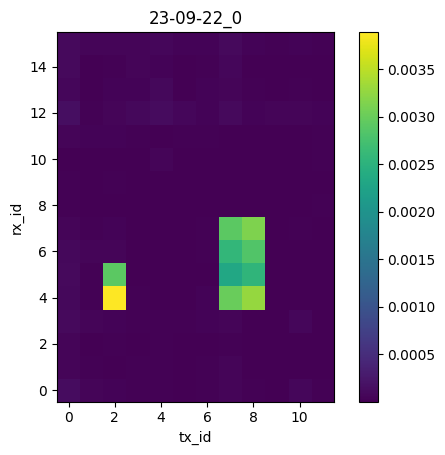

loaded data with shape torch.Size([1022, 192, 200])
torch.Size([1022, 192, 200])
tensor(0.1048) tensor(False)
tensor(0.1254) tensor(False)
tensor(0.1393) tensor(False)
tensor(0.1304) tensor(False)
tensor(0.0864) tensor(False)
tensor(0.0872) tensor(False)
tensor(0.0969) tensor(False)
tensor(0.0903) tensor(False)
tensor(0.0724) tensor(False)
tensor(0.0703) tensor(False)
tensor(0.0700) tensor(False)
tensor(0.0655) tensor(False)
tensor(0.1054) tensor(False)
tensor(0.1139) tensor(False)
tensor(0.0980) tensor(False)
tensor(0.0950) tensor(False)
tensor(0.0970) tensor(False)
tensor(0.1153) tensor(False)
tensor(0.1282) tensor(False)
tensor(0.1243) tensor(False)
tensor(0.0972) tensor(False)
tensor(0.0931) tensor(False)
tensor(0.1039) tensor(False)
tensor(0.0919) tensor(False)
tensor(0.0864) tensor(False)
tensor(0.0808) tensor(False)
tensor(0.0802) tensor(False)
tensor(0.0744) tensor(False)
tensor(0.0962) tensor(False)
tensor(0.1032) tensor(False)
tensor(0.0903) tensor(False)
tensor(0.0919) tenso

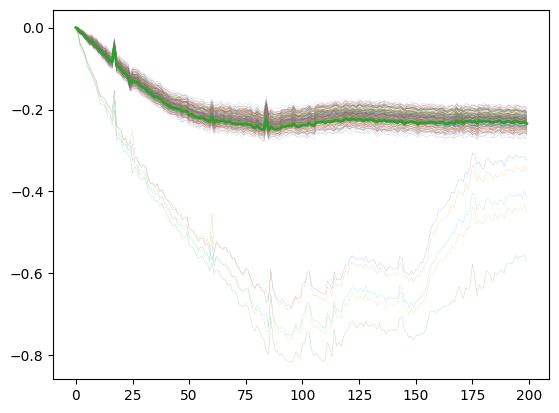

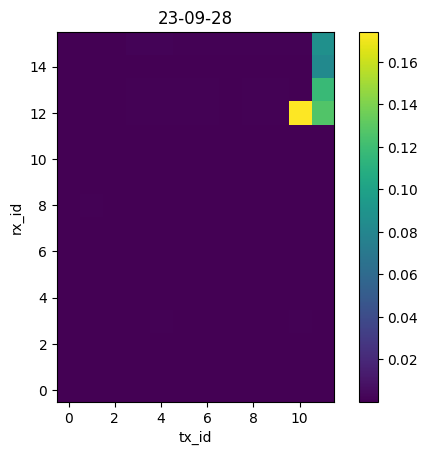

loaded data with shape torch.Size([1022, 192, 983])
torch.Size([1022, 192, 983])
tensor(0.0520) tensor(False)
tensor(0.0577) tensor(False)
tensor(0.0654) tensor(False)
tensor(0.0670) tensor(False)
tensor(0.0361) tensor(False)
tensor(0.0425) tensor(False)
tensor(0.0474) tensor(False)
tensor(0.0379) tensor(False)
tensor(0.0395) tensor(False)
tensor(0.0419) tensor(False)
tensor(0.0420) tensor(False)
tensor(0.0417) tensor(False)
tensor(0.0839) tensor(False)
tensor(0.0671) tensor(False)
tensor(0.0650) tensor(False)
tensor(0.0573) tensor(False)
tensor(0.0506) tensor(False)
tensor(0.0617) tensor(False)
tensor(0.0664) tensor(False)
tensor(0.0580) tensor(False)
tensor(0.0433) tensor(False)
tensor(0.0411) tensor(False)
tensor(0.0368) tensor(False)
tensor(0.0378) tensor(False)
tensor(0.0431) tensor(False)
tensor(0.0481) tensor(False)
tensor(0.0472) tensor(False)
tensor(0.0353) tensor(False)
tensor(0.0724) tensor(False)
tensor(0.0643) tensor(False)
tensor(0.0679) tensor(False)
tensor(0.0593) tenso

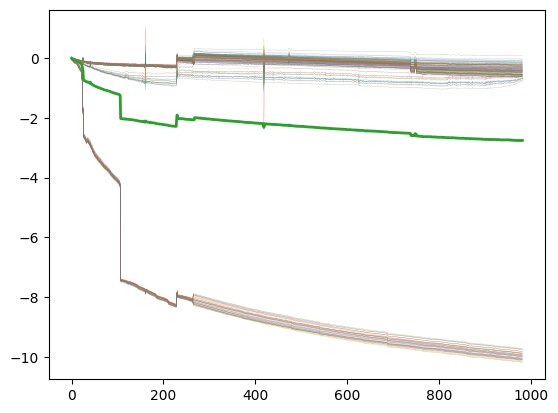

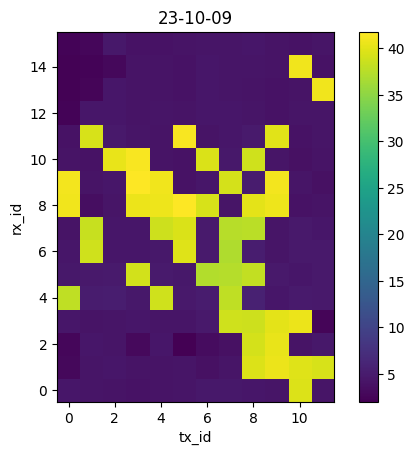

loaded data with shape torch.Size([1022, 192, 2882])
torch.Size([1022, 192, 2882])
tensor(0.0392, dtype=torch.float64) tensor(False)
tensor(0.0422, dtype=torch.float64) tensor(False)
tensor(0.0500, dtype=torch.float64) tensor(False)
tensor(0.0464, dtype=torch.float64) tensor(False)
tensor(0.0326, dtype=torch.float64) tensor(False)
tensor(0.0322, dtype=torch.float64) tensor(False)
tensor(0.0355, dtype=torch.float64) tensor(False)
tensor(0.0338, dtype=torch.float64) tensor(False)
tensor(0.0464, dtype=torch.float64) tensor(False)
tensor(0.0412, dtype=torch.float64) tensor(False)
tensor(0.0398, dtype=torch.float64) tensor(False)
tensor(0.0366, dtype=torch.float64) tensor(False)
tensor(0.0678, dtype=torch.float64) tensor(False)
tensor(0.0571, dtype=torch.float64) tensor(False)
tensor(0.0569, dtype=torch.float64) tensor(False)
tensor(0.0482, dtype=torch.float64) tensor(False)
tensor(0.0371, dtype=torch.float64) tensor(False)
tensor(0.0442, dtype=torch.float64) tensor(False)
tensor(0.0474, dt

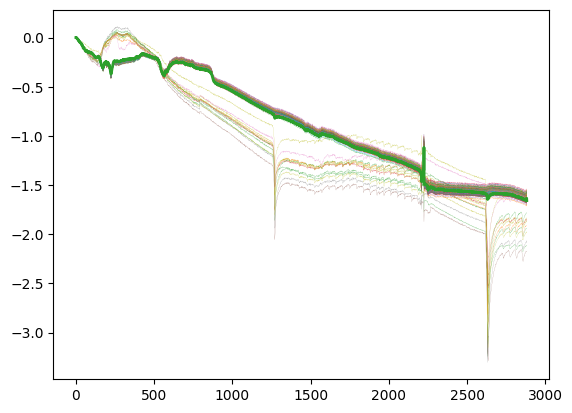

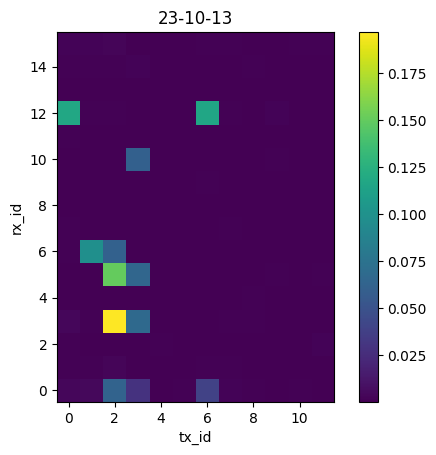

loaded data with shape torch.Size([2048, 768, 992])
torch.Size([2048, 768, 992])
converting to real spectrum!
converting to real spectrum!
converting to real spectrum!
converting to real spectrum!
converting to real spectrum!
converting to real spectrum!
converting to real spectrum!
converting to real spectrum!
converting to real spectrum!
converting to real spectrum!
converting to real spectrum!
converting to real spectrum!
converting to real spectrum!
converting to real spectrum!
converting to real spectrum!
converting to real spectrum!
converting to real spectrum!
converting to real spectrum!
converting to real spectrum!
converting to real spectrum!
converting to real spectrum!
converting to real spectrum!
converting to real spectrum!
converting to real spectrum!
converting to real spectrum!
converting to real spectrum!
converting to real spectrum!
converting to real spectrum!
converting to real spectrum!
converting to real spectrum!
converting to real spectrum!
converting to real s

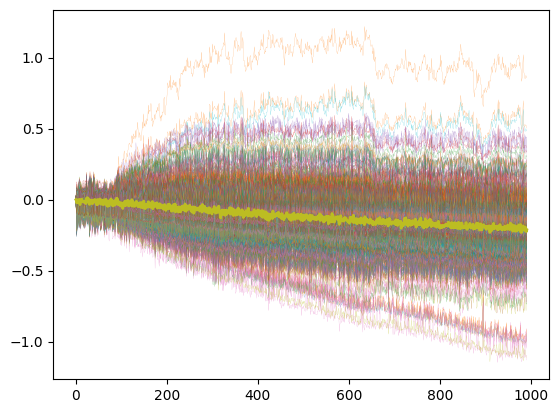

KeyError: 256

In [7]:
dates = ['23-09-22_0', '23-09-28', '23-10-09', '23-10-13', '23-10-17_Tina']
for date in dates:
    header,_,data,_ = load_all(f'/home/dgotzens/recording/{date}/')
    M,K,L = data.shape
    print(data.shape)

    img = torch.empty((max(rx_id)+1, max(tx_id)+1))
    drift = torch.empty(K,L)
    for k in range(K):
        drift[k,:] = tools.unwrap(tools.drift(tools.rangedata(data[:,k,:])).angle())
        plt.plot(drift[k,:], linewidth=0.1)
    plt.plot(drift.mean(0), linewidth=2)
    plt.show()
    rx_id = {int(ramp['RampId']) : int(ramp['RxId']) for chirp in header['Chirps'] for ramp in chirp['Ramps']}
    tx_id = {int(ramp['RampId']) : int(chirp['ChirpId']) for chirp in header['Chirps'] for ramp in chirp['Ramps']}

    rx_id = [rx_id[k] for k in range(K)]
    tx_id = [tx_id[k] for k in range(K)]
    for k in range(K):
        img[rx_id[k],tx_id[k]] = mse(drift[k,:], drift.mean(0))
    plt.imshow(img, origin='lower')
    plt.colorbar()
    plt.title(date)
    plt.ylabel('rx_id')
    plt.xlabel('tx_id')
    plt.show()

loaded data with shape torch.Size([1022, 192, 983])
tensor(0.0520) tensor(False)
tensor(1.5052)
loaded data with shape torch.Size([2048, 768, 992])
converting to real spectrum!
33.33741858938722


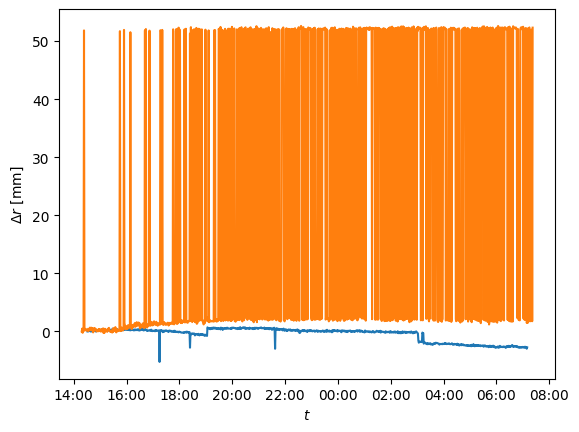

In [32]:
nfft = 2**21

header,time,data,_ = load_all('/home/dgotzens/recording/23-10-09/')
time = [t + pd.Timedelta(days=7) for t in time]

shift = tools.reflidx(tools.rangedata(data[:,0,:], N=nfft))
print(25/nfft * shift.sum()/len(shift))
shift -= shift.clone()[0]
plt.plot(time, 25e3/nfft * shift)
plt.gca().xaxis.set_major_formatter(tools.hhmm)
plt.xlabel(r'$t$')
plt.ylabel(r'$\Delta r$ [mm]')
plt.grid()

header,time,data,_ = load_all('/home/dgotzens/recording/23-10-17_Tina/')
shift = tools.reflidx(tools.rangedata(data[:,0,:], N=nfft))
print(max(tools.ranges(header)))
shift -= shift.clone()[0]
plt.plot(time, 25e3/nfft * shift)
plt.gca().xaxis.set_major_formatter(tools.hhmm)
plt.xlabel(r'$t$')
plt.ylabel(r'$\Delta r$ [mm]')
plt.grid()
plt.show()

